In [1]:
    !pip install pyvi
    !pip install -U spacy==3.* 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
import spacy

import gensim # thư viện NLP
import os 
import numpy as np
import pandas as pd

In [4]:
from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spacy

from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [6]:
# !git clone https:// git
# !unzip ./ git
# !unzip ./ git 
# !em -rf ./ git

In [299]:
%%time
def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding = "utf-16") as f:
                lines = f.readlines()
            sentence = ' '.join(lines)
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

folder_paths = {
    "train": "C:/Users/AD/Desktop/NLP - FINAL/Train_Full",
    "test": "C:/Users/AD/Desktop/NLP - FINAL/Test_Full"
}

train_df = load_data_from_path(folder_paths["train"])
val_df = load_data_from_path(folder_paths["test"]) # val is test

Wall time: 11.2 s


In [300]:
train_df['sentence'][0]

' Thành lập dự án POLICY phòng chống HIV/AIDS ở VN (NLĐ)- Quỹ hỗ trợ khẩn cấp về AIDS của Hoa Kỳ vừa thành lập dự án POLICY tại VN với cam kết hỗ trợ Chính phủ và nhân dân VN đối phó HIV/AIDS.Dự án có nhiệm vụ chính là cải thiện công tác phòng chống HIV/AIDS thông qua các lĩnh vực xây dựng chính sách, rà soát các văn bản pháp luật, xây dựng chiến lược quảng bá, xây dựng chương trình đào tạo về phòng chống HIV/AIDS, lên kế hoạch bố trí nguồn lực, huấn luyện và nghiên cứu về phương tiện truyền thông đại chúng, tổ chức các hoạt động nhằm giảm kỳ thị và phân biệt đối xử đối với người có HIV/AIDS... Theo TTXVN, dự án POLICY đặc biệt quan tâm đến công tác truyền thông phòng chống HIV/AIDS, coi đây là một biện pháp tích cực và hữu hiệu trong việc phòng chống có hiệu quả HIV/AIDS. Thời gian tới, dự án POLICY sẽ tiếp tục tổ chức các hoạt động nhằm nâng cao nhận thức cho những người có trách nhiệm với công tác chỉ đạo phòng chống HIV/AIDS.\n \n'

In [301]:
# Function to preprocess and tokenize a text
def preprocess_and_tokenize(text):
    processed_lines = gensim.utils.simple_preprocess(text)
    processed_lines = ViTokenizer.tokenize(' '.join(processed_lines))
    return processed_lines

Dòng lệnh processed_lines = simple_preprocess(lines) dùng để xử lý xoá các ký tự đặc biệt.\n
Dòng lệnh processed_lines = ViTokenizer.tokenize(lines) dùng để tách từ trong văn bản tiếng Việt.

In [302]:
# Apply the function to the 'sentence' column and create a new column 'processed_text'
train_df['sentence'] = train_df['sentence'].apply(preprocess_and_tokenize)

In [303]:
train_df['label'][100]

'Chinh tri Xa hoi'

In [304]:
train_df['sentence'][100]

'việc xây_dựng đại_học hàng_đầu là khẩp cấp giáo_dục đại_học nước ta có số_lượng sinh_viên khá đông_đảo nhưng chất_lượng cần phải nâng lên nhiều mới đạt yêu_cầu hiện_nay việt nam không có một đh nào có_thể xếp_hạng trong khu_vực asean không có một đh nào ngay cả các đại_học quốc_gia tại hà_nội và tphcm có_thể xem là nổi_trội hơn hẳn các đh khác trong vài năm trở_lại đây cải_tổ giáo_dục tại việt nam là một đề_tài thảo_luận rất sôi_động trên các diễn_đàn công cũng như tư sau chuyến viếng_thăm đại_học harvard của thủ_tướng tháng sáu vừa_qua các thảo_luận có xu_hướng tập_trung vào đại_học đẳng_cấp quốc_tế đại_học chất_lượng cao đhclc và đại_học hàng_đầu đhhđ gần đây nhất gs thomas vallely giám_đốc chuơng trình việt_nam tại đại_học harvard đã gửi đến chính_phủ việt nam một đề_cương về xây_dựng đhhđ tại việt nam nội_dung của đề_cương này cũng tương_tự như các đề_xuất đề_án trong xêmina cải_cách giáo_dục do giáo_sư hoàng_tụy chủ xướng hay hội_thảo hè đà_nẵng do một nhóm việt kiều trí_thức tổ_

In [305]:
# Apply the function to the 'sentence' column and create a new column 'processed_text'
val_df['sentence'] = val_df['sentence'].apply(preprocess_and_tokenize)

In [306]:
val_df['label'][0]

'Chinh tri Xa hoi'

In [307]:
val_df['sentence'][0]

'mạo_hiểm rừng đa mi cuộc hành_quân khám_phá thác sương_mù ẩn mình trong cánh rừng đa mi hàm_thuận bắc bình thuận bạt_ngàn là hồ thủy_điện đa mi đẹp như một nàng công_chúa ngọn thác sương_mù hùng_vĩ cao_ngất uốn_lượn như con rồng bạc khổng_lồ xuyên rừng vào thác sương_mù trời đã về chiều khi chúng_tôi đến được hồ thủy_điện đa mi rộng ha với rất nhiều hòn đảo nhỏ đẹp như bức tranh_thủy mạc dần hiện ra trong ánh hoàng_hôn huyền_ảo nơi lưu_trú đêm đầu_tiên của chúng_tôi là khách_sạn ngàn sao sân_bay dã_chiến của nhà_máy thủy_điện với tất_cả dịch_vụ phải tự lo đến thủy_điện nhưng nơi hạ trại lại không có điện đêm xuống bốn bề tối đen như mực lửa bùng lên bất_ngờ hoài nhưỡng bí_thư chi_đoàn xã đa mi cùng một nhóm thanh_niên xã vượt hơn km đường đèo vào thăm lần đầu_tiên có đoàn thành_phố lại đêm đó hay tin bọn mình rủ nhau đi liền các bạn cho biết lời ca tiếng hát vang theo tiếng đàn guitar chập chùng đêm rừng làm ấm lòng cả khách lẫn chủ tầng thác sương_mù trời tờ_mờ sáng tiếng chim hót vé

In [308]:
def spacy_tokenizer(doc):
  return [t.text for t in preprocess_and_tokenize(doc) if \
          not t.is_punct and \
          not t.is_space and \
          t.is_alpha]
# def spacy_tokenizer(text):
#     return [token.lemma_ for token in nlp(text) if not token.is_stop and not token.is_punct]

In [309]:
# train -> (train, validation), test

In [310]:
train_data = train_df['sentence']
train_labels = train_df['label']
val_data = val_df['sentence']
val_labels = val_df['label']
print('Training data size: {}'.format(len(train_data)))
print('Validation data size: {}'.format(len(val_data)))

Training data size: 33759
Validation data size: 50373


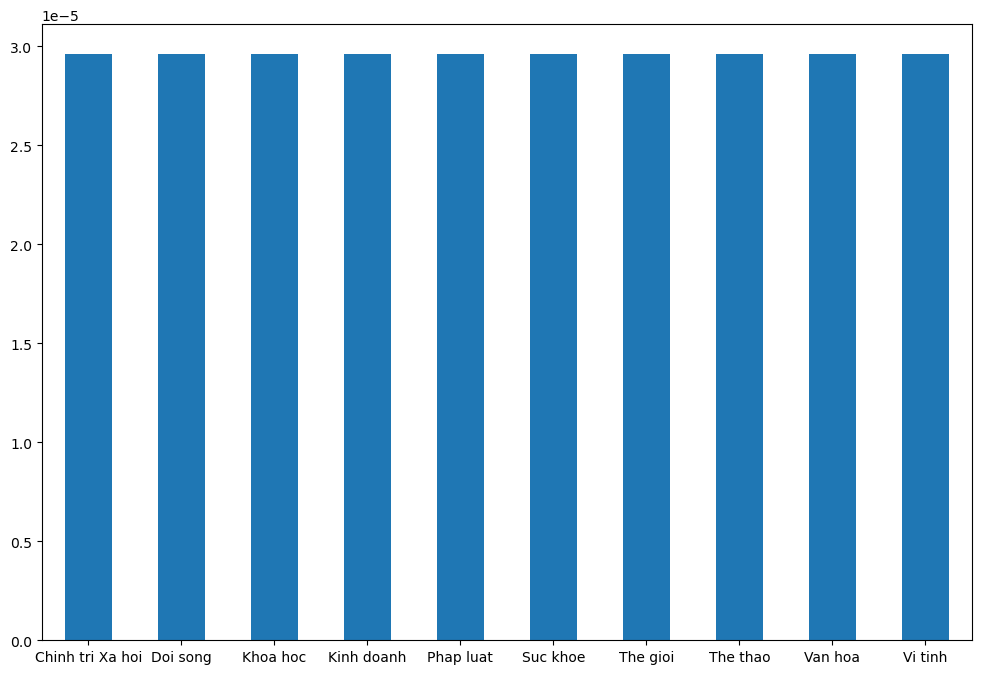

In [311]:
    array = train_df['label'].unique()

    bins, counts = np.unique(array, return_counts=True)
    freq_series = pd.Series(counts/len(train_df))
    plt.figure(figsize=(12, 8))
    ax = freq_series.plot(kind='bar')
    ax.set_xticklabels(bins, rotation=0)
    plt.show()

In [312]:
%%time
# Use the default settings of TfidfVectorizer.
# Use TfidfVectorizer with spaCy tokenizer
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(train_data) # learn vocabulary and idf from training set
train_data_tfidf =  tfidf_vect.transform(train_data)
val_data_tfidf =  tfidf_vect.transform(val_data)

Wall time: 28 s


In [313]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=40000, random_state=42)
# svd.fit(train_df_tfidf)

# train_df_tfidf_svd = svd.transform(train_df_tfidf)
# train_df_tfidf_svd = svd.transform(test_df_tfidf)

In [314]:
# encoder = preprocessing.LabelEncoder()
# train_labels = encoder.fit_transform(train_labels)
# val_labels = encoder.fit_transform(val_labels)

# encoder.classes_ # kết quả: array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
#                  #                 'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
#                  #                 'Vi tinh'], dtype='<U16')

In [315]:
train_data.head()

0    thành_lập dự_án policy phòng_chống hiv aids vn...
1    hơn khách đến vịnh nha trang theo trực_ban bộ_...
2    tphcm khai_trương dịch_vụ lặn biển săn cá_mập ...
3    du_lịch vn sẽ có tư_vấn nước_ngoài ông phạm từ...
4    quy_chế tuyển_sinh không làm_tròn điểm từng bà...
Name: sentence, dtype: object

In [316]:
val_data.head()

0    mạo_hiểm rừng đa mi cuộc hành_quân khám_phá th...
1    tàu du_lịch cao_tốc cần thơ phnom penh công_ty...
2    miền trung được mùa khách thái đoàn du_khách t...
3    kỳ_quan mới của thế_giới cầu akashi kaikyo khô...
4    khối thi được mấy trường thi khối vào đh bách_...
Name: sentence, dtype: object

In [317]:
nb_classifier = MultinomialNB()
nb_classifier.fit(train_data_tfidf, train_labels)
nb_classifier.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [318]:
# Get predictions on training set and calculate F1 score.
# See documentation above for more details on what "macro" means.
train_preds = nb_classifier.predict(train_data_tfidf)
print('F1 score on initial training set: {}'.format(metrics.f1_score(train_labels, train_preds, average='macro')))

F1 score on initial training set: 0.871851374152196


The next step is to see how well the classifier performs on the validation set.

In [319]:
val_preds = nb_classifier.predict(val_data_tfidf)
print('F1 score on filtered validation set: {}'.format(metrics.f1_score(val_labels, val_preds, average='macro')))

F1 score on filtered validation set: 0.8381871190862169


                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.67      0.95      0.78      7567
        Doi song       0.69      0.71      0.70      2036
        Khoa hoc       0.97      0.41      0.57      2096
      Kinh doanh       0.95      0.72      0.82      5276
       Phap luat       0.88      0.90      0.89      3788
        Suc khoe       0.89      0.93      0.91      5417
        The gioi       0.96      0.86      0.91      6716
        The thao       0.98      0.97      0.97      6667
         Van hoa       0.92      0.93      0.92      6250
         Vi tinh       0.95      0.87      0.90      4560

        accuracy                           0.87     50373
       macro avg       0.88      0.82      0.84     50373
    weighted avg       0.89      0.87      0.87     50373



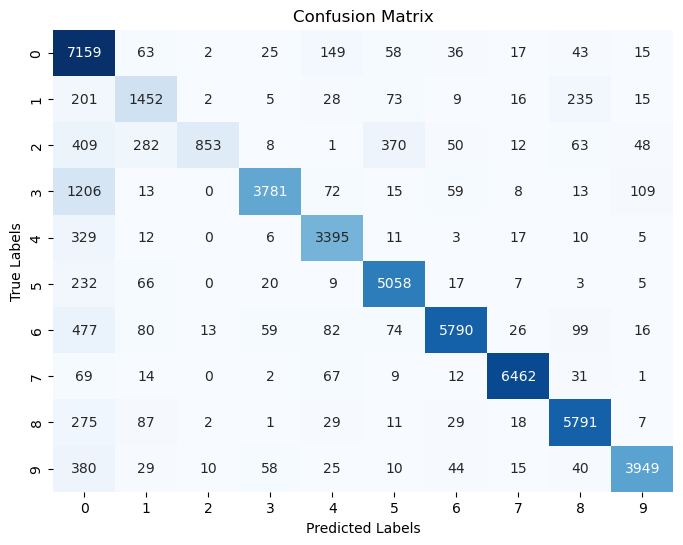

In [320]:
print(classification_report(val_labels, val_preds))
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

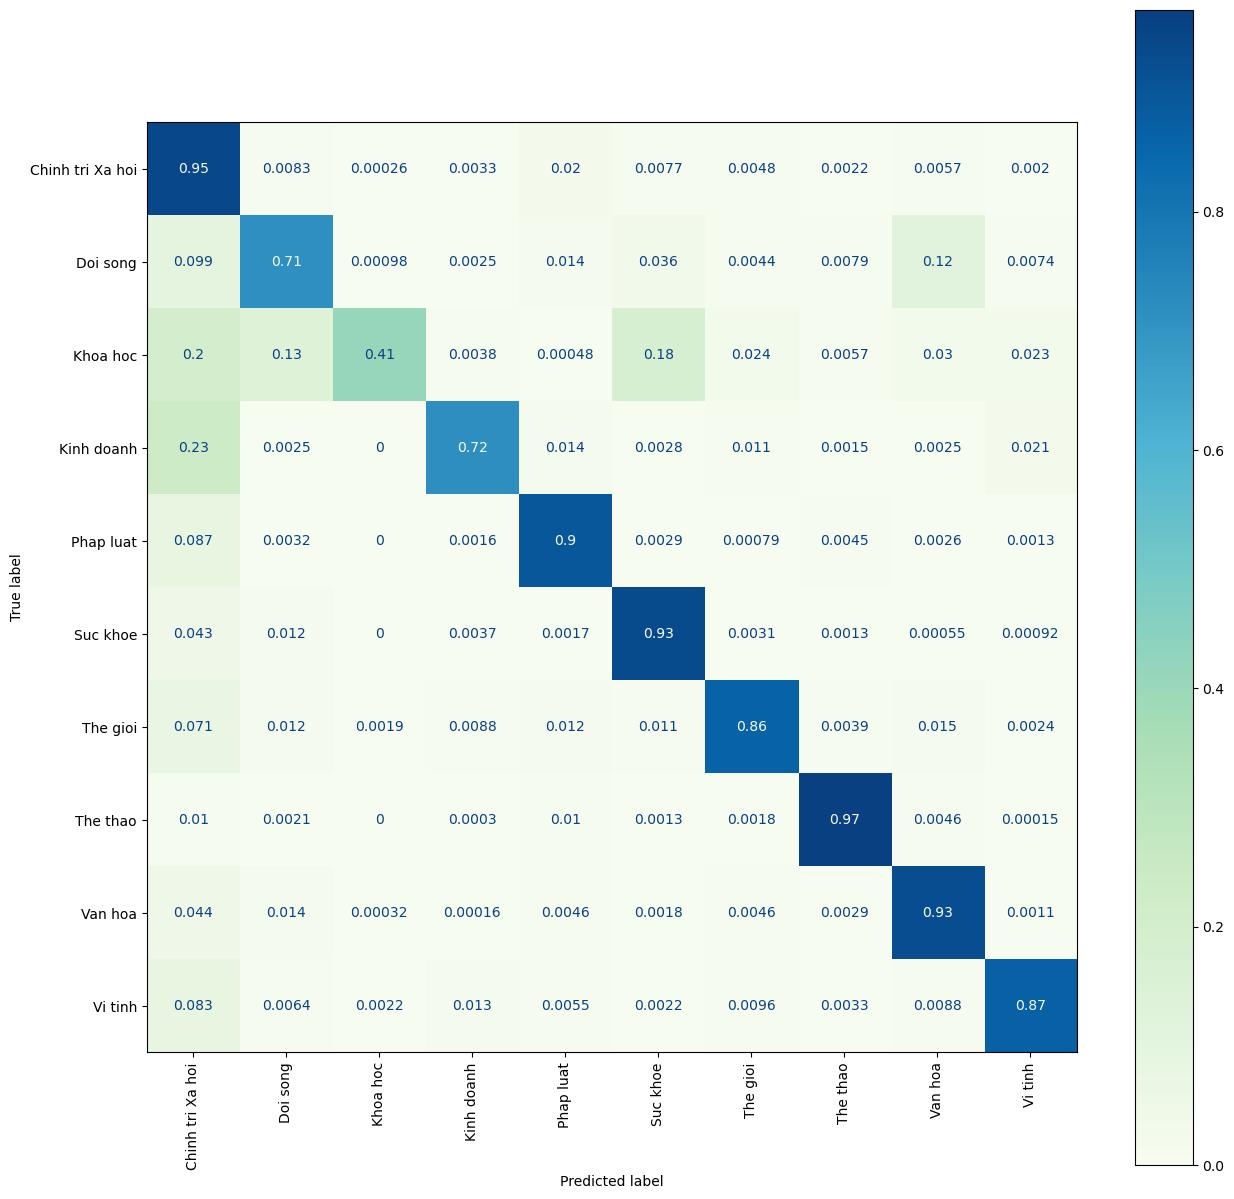

In [321]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay.from_estimator(nb_classifier, val_data_tfidf, val_labels, normalize='true', display_labels=array, xticks_rotation='vertical', ax=ax, cmap='GnBu')

In [322]:
  print(classification_report(val_labels, val_preds))

                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.67      0.95      0.78      7567
        Doi song       0.69      0.71      0.70      2036
        Khoa hoc       0.97      0.41      0.57      2096
      Kinh doanh       0.95      0.72      0.82      5276
       Phap luat       0.88      0.90      0.89      3788
        Suc khoe       0.89      0.93      0.91      5417
        The gioi       0.96      0.86      0.91      6716
        The thao       0.98      0.97      0.97      6667
         Van hoa       0.92      0.93      0.92      6250
         Vi tinh       0.95      0.87      0.90      4560

        accuracy                           0.87     50373
       macro avg       0.88      0.82      0.84     50373
    weighted avg       0.89      0.87      0.87     50373



In [323]:
# Load the new data, andApply the function to the 'sentence' column and create a new column 'processed_text'
test_df = load_data_from_path(folder_paths["test"])

In [324]:
#fig, ax = plt.subplots(figsize=(15, 15))

#disp = ConfusionMatrixDisplay.from_estimator(nb_classifier, test_data, val_labels, normalize='true', display_labels=filtered_training_corpus.target_names, xticks_rotation='vertical', ax=ax)

In [325]:
# Apply the function to the 'sentence' column and create a new column 'processed_text'
test_df['sentence'] = test_df['sentence'].apply(preprocess_and_tokenize)
test_data = test_df['sentence']
test_labels = test_df['label']

In [326]:
text_classifier = Pipeline([
  ('vectorizer', TfidfVectorizer(analyzer='word', max_features=30000)),
  ('classifier', MultinomialNB(alpha=0.01))
])

In [327]:
text_classifier.fit(test_data, test_labels)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=30000)),
                ('classifier', MultinomialNB(alpha=0.01))])

In [328]:
def classify_text(clf, doc, labels=None):
  probas = clf.predict_proba([doc]).flatten()
  max_proba_idx = np.argmax(probas)
  
  if labels is not None:
    most_proba_class = labels[max_proba_idx]
  else:
    most_proba_class = max_proba_idx

  return (most_proba_class, probas[max_proba_idx])

In [329]:
# Post from r/Vi tinh

s = 'Ra mắt siêu thị game PTV - Giành lại miền đất hứa Từ 28-3, game online PTV - Giành lại miền đất hứa chính thức bắt đầu Tháng mua sắm PTV với việc mở rộng Siêu thị PTV và chương trình khuyến mãi game online lớn nhất từ trước tới nay . Trong Tháng mua sắm này, 8 mặt hàng mới sẽ được đưa vào Siêu thị PTV - nơi buôn bán hàng hóa và dịch vụ giá trị gia tăng của game PTV với mục đích giúp game thủ không mất quá nhiều thời gian chơi game vẫn đạt được các thành quả tốt trong game. Ông Trần Vinh - Giám đốc sản phẩm PTV - cho biết: “Mặc dù Thông tư về Game online chưa bắt đầu có hiệu lực, nhưng với phương châm Vì game thủ ngay từ những ngày đầu của PTV, chúng tôi đã làm việc với các đối tác Hàn Quốc để đưa ra các mặt hàng trong Siêu thị PTV giúp người chơi đảm bảo các thành quả trong game mà không mất quá nhiều thời gian như Tăng Tốc Dược, Phúc Thạch, Bùa Hồi Sinh… Sắp tới, khi quy định giới hạn giờ chơi tính điểm trong game bắt đầu có hiệu lực, các hàng hóa này sẽ giúp game thủ không bị suy giảm thành quả”. Ông Trần Vinh cũng cho biết sắp tới, Siêu thị PTV sẽ tung tiếp ra các món hàng có tính giải trí cao như thuốc nhuộm tóc cho các nhân vật trong game, thời trang PTV thế hệ mới… để game thủ có thể tùy ý thay đổi hình dáng và quần áo cho nhân vật của mình. Ngoài ra, trong chương trình khuyến mãi này, tất cả các game thủ mua thẻ nạp tiền PTV trong thời gian từ ngày 28-3-2006 đến ngày 15-5-2006 sẽ được tham gia vào chương trình quay bốc thăm trúng thưởng tổ chức hàng ngày trên trang web PTV, với tổng số gần 6000 giải thưởng. PTV - Giành lại miền đất hứa là phiên bản Việt hóa của trò chơi Priston Tale do Công ty Priston Inc. của Hàn Quốc phát triển, Công ty Viễn thông FPT độc quyền phát hành tại Việt Nam, hiện số game thủ đăng ký đã lên tới gần 900,000 người. '

classify_text(text_classifier, s, array)

('Vi tinh', 0.9488322903963121)

In [330]:
# Post from r/Theo thao

s =  "World Cup khắp mọi nơi Nhân hội thảo “Tầm nhìn bóng đá “ vừa diễn ra tại Đức, để minh họa cho tính hiệu quả trong công tác tuyên truyền về vòng chung kết World Cup 2006, nước chủ nhà đã có sáng kiến đưa cúp thế giới vào nhà... vệ sinh.Với những chiếc bồn bên trong mô phỏng khung thành, quả bóng và cầu môn, dường như ban tổ chức World Cup 2006 muốn người dân Đức luôn nhớ đến giải đấu họ sắp làm chủ nhà." 

classify_text(text_classifier, s, array)

('The thao', 0.428157760120976)

In [331]:
# Post from r/Suc khoe
s = 'Rụng lông mi nhiều Tôi 32 tuổi,Mỗi lần rửa mặt chạm trúng lông mi lại rụng vài sợi. Xin bác sĩ cho biết tôi có bệnh gì không, có ảnh hưởng đến sức khỏe không? Một bạn đọc (TPHCM)- Bác sĩ Phạm Thị Bích Thủy, Bệnh viện Mắt TPHCM, trả lời: Lông mi rụng nhiều và thường xuyên có thể là triệu chứng của viêm bờ mi. Bệnh có nhiều nguyên nhân như nấm, mắt hột, dị ứng... Bạn nên đến cơ sở có chuyên khoa mắt để được bác sĩ khám trực tiếp, cho thuốc điều trị và tư vấn cách chăm sóc vệ sinh mắt. '

classify_text(text_classifier, s, array)

('Suc khoe', 0.9715340364534588)

In [332]:
# Post from r/Suc khoe
s = 'Lông mi'
classify_text(text_classifier, s, array)

('Suc khoe', 0.8715612354248863)

In [333]:
# Post from r/Phap luat

s = 'Tài xế, phụ xế xe buýt đánh bị thương người đi đường (NLĐ)- Sáng 4-5, Báo Người Lao Động nhận được thông tin của ông Trương Văn Trương (ngụ tại phường Linh Trung, quận Thủ Đức), phản ánh: Hồi 7 giờ 30, trên đường đến Nhà máy Nước Thủ Đức làm việc, dù ông đã bật đèn tín hiệu xin rẽ trái vào đường Lê Văn Chí, tài xế chiếc xe buýt (biển số 53M-6489; HTX 15) đang chạy phía sau vẫn “cố tình” để cho bánh trước của xe buýt quẹt vào chân của con ông là anh Trương Tấn Triệu (đang ngồi phía sau).Khi anh Triệu xuống xe đề nghị xin lỗi, tài xế và phụ xế xe buýt đã đánh anh gãy xương mũi, phải đưa vào Bệnh viện Đa khoa Thủ Đức điều trị. Ngay sau khi vụ việc xảy ra, Công an phường Linh Chiểu, quận Thủ Đức đã mời các bên có liên quan hòa giải. Trước mắt, chủ xe buýt đã tạm ứng 1 triệu đồng chi phí điều trị cho anh Triệu. Riêng chiếc xe buýt trên bị công an phường tạm giữ. Trao đổi với phóng viên Báo Người Lao Động chiều cùng ngày, ông Phạm Đình Đức, Phó Giám đốc Trung tâm Quản lý và Điều hành vận tải hành khách công cộng - Sở GTCC, cho rằng: “Hành vi đánh người của tài xế và phụ xế xe buýt không thể chấp nhận được. Trung tâm đã yêu cầu Ban Chủ nhiệm (BCN) HTX 15 buộc tài xế, phụ xế xe buýt nói trên làm tường trình để có hướng xử lý kỷ luật. Theo ông Nguyễn Văn Thảo, Chủ nhiệm HTX 15, sau khi đem xe về đội, đến 16 giờ chiều cùng ngày, BCN vẫn chưa thấy tài xế và phụ xế xe buýt trình diện. Căn cứ vào mức độ sai phạm, BCN sẽ có hình thức kỷ luật. Chiều cùng ngày, HTX 15 đã cử người thăm sức khỏe anh Triệu tại bệnh viện. '

classify_text(text_classifier, s, array)

('Chinh tri Xa hoi', 0.5354010284238984)

In [334]:
# Post from r/The gioi
s = 'Xác định thêm tên tuổi 6 đối tượng gây án (NLĐ)- Thượng tá Vũ Văn Lâu, Phó Giám đốc Công an tỉnh Gia Lai, cho biết: Tính đến ngày 17-6, ngoài 2 đối tượng đã bị khởi tố về tội “Gây rối trật tự công cộng”, Công an tỉnh Gia Lai đã điều tra, xác minh được tên tuổi của 6 đối tượng khác dùng hung khí đi trên 3 mô tô đánh giám thị vào ngày 8-6.Bọn chúng gồm: Ngô Cường Toàn, Nguyễn Mạnh Tuấn, Phạm Mạnh Cường, Tạ Quang Cường (hiện đang cho tại ngoại) và 2 đối tượng khác có tên là Quy, Thành sau khi gây án đã đi TP Quy Nhơn (Bình Định) để ôn thi đại học nên chưa lấy được lời khai. Cả 6 đối tượng này đều là học sinh vừa dự thi tốt nghiệp THPT và đều sinh sống trên địa bàn huyện K’bang. Vụ án đang được tiếp tục điều tra mở rộng.'
classify_text(text_classifier, s, array)

('Phap luat', 0.8602438890740964)

In [335]:
# Post from r/
s = 'Một câu ngẫu nhiên không có ý nghĩa gì để thử nghiệm mô hình'

classify_text(text_classifier, s, array)

('Van hoa', 0.33685851434727354)

In [358]:
encoder = preprocessing.LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
val_labels = encoder.fit_transform(val_labels)

encoder.classes_ 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
def KNN(X_train, X_test, y_train, y_test):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
  k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

  global KNNCV
  knn = KNeighborsClassifier(n_neighbors = 1)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  KNNCV = (cross_val_score(knn, X_train, y_train, cv=3, n_jobs=3, scoring = 'accuracy').mean())
  
  print(classification_report(y_test, knn_pred))
  # Compute the confusion matrix
  cm = confusion_matrix(y_test, knn_pred)
  # Plot the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


F1 score on initial training set: 0.9980688923514925
F1 score on filtered validation set: 0.8381871190862169
              precision    recall  f1-score   support

           0       0.67      0.95      0.78      7567
           1       0.69      0.71      0.70      2036
           2       0.97      0.41      0.57      2096
           3       0.95      0.72      0.82      5276
           4       0.88      0.90      0.89      3788
           5       0.89      0.93      0.91      5417
           6       0.96      0.86      0.91      6716
           7       0.98      0.97      0.97      6667
           8       0.92      0.93      0.92      6250
           9       0.95      0.87      0.90      4560

    accuracy                           0.87     50373
   macro avg       0.88      0.82      0.84     50373
weighted avg       0.89      0.87      0.87     50373



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


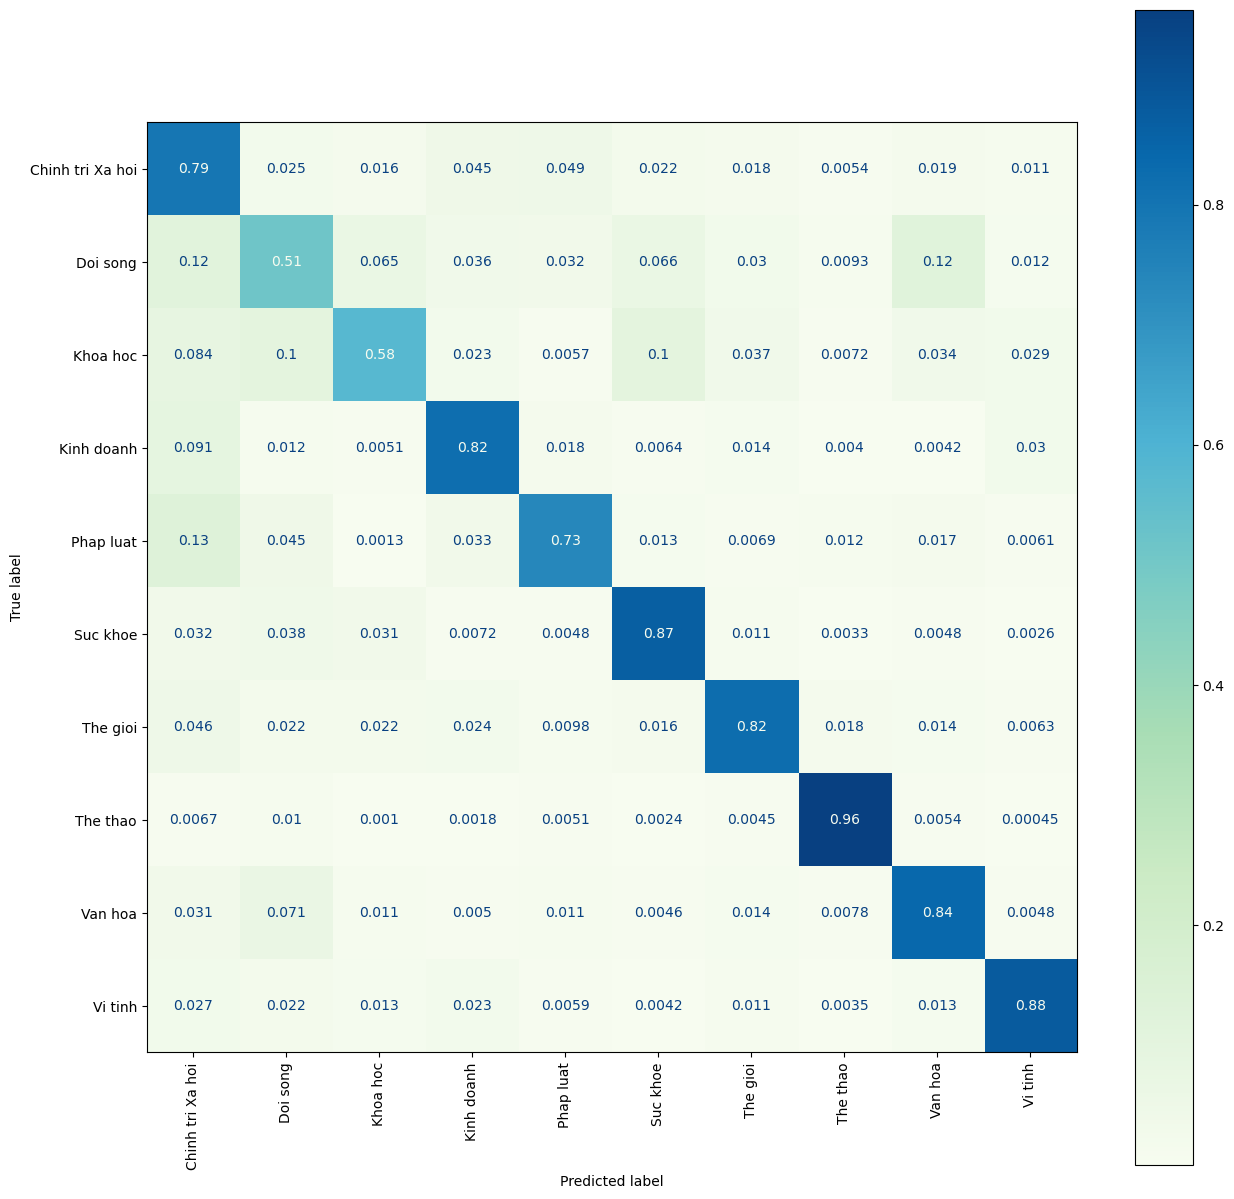

In [363]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_data_tfidf, train_labels)
knn_val_preds = nb_classifier.predict(val_data_tfidf)
knn_train_preds = knn.predict(train_data_tfidf)
global KNNCV
KNNCV = (cross_val_score(knn, train_data_tfidf, train_labels, cv=3, n_jobs=3, scoring = 'accuracy').mean())
print('F1 score on initial training set: {}'.format(metrics.f1_score(train_labels, knn_train_preds, average='macro')))
print('F1 score on filtered validation set: {}'.format(metrics.f1_score(val_labels, knn_val_preds, average='macro')))
val_preds = nb_classifier.predict(val_data_tfidf)
print(classification_report(val_labels, knn_val_preds))
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay.from_estimator(knn, val_data_tfidf, val_labels, normalize='true', display_labels=array, xticks_rotation='vertical', ax=ax, cmap='GnBu')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.73      0.79      0.76      7567
        Doi song       0.40      0.51      0.45      2036
        Khoa hoc       0.62      0.58      0.60      2096
      Kinh doanh       0.82      0.82      0.82      5276
       Phap luat       0.78      0.73      0.76      3788
        Suc khoe       0.86      0.87      0.86      5417
        The gioi       0.90      0.82      0.86      6716
        The thao       0.95      0.96      0.96      6667
         Van hoa       0.87      0.84      0.86      6250
         Vi tinh       0.90      0.88      0.89      4560

        accuracy                           0.82     50373
       macro avg       0.78      0.78      0.78     50373
    weighted avg       0.82      0.82      0.82     50373



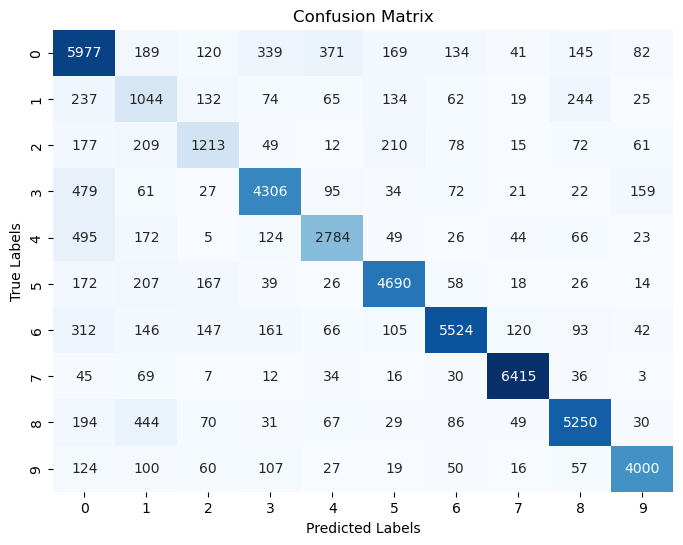

In [352]:
KNN(train_data_tfidf, val_data_tfidf, train_labels, val_labels)

In [353]:
# classifiers = {
# #     'Logistic Regression': LogisticRegression(),
#     'Gaussian Naive Bayes': MultinomialNB()
# #     'Decision Tree': DecisionTreeClassifier(criterion='gini'),
# #     'Support Vector Machine': SVC(probability=True),
# #     'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=1)
# }

# fig, ax_arr = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))

# gs_nb = MultinomialNB()
# classifier.fit(train_data_tfidf, train_labels)
# probs = classifier.predict_proba(val_data_tfidf)
# preds = probs[:, 1]
# fpr, tpr, thresholds = metrics.roc_curve(val_labels, preds)
# roc_auc = metrics.auc(fpr, tpr)

# ax.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
# ax.plot([0, 1], [0, 1], 'r--')
# ax.set_title(f'Receiver Operating Characteristic - {name}', fontsize=20)
# ax.set_ylabel('True Positive Rate', fontsize=20)
# ax.set_xlabel('False Positive Rate', fontsize=15)
# ax.legend(loc='lower right', prop={'size': 16})

# plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
# plt.show()